In [1]:
# Librerie...
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from scipy.optimize import curve_fit
from ipywidgets import interactive, interact
plt.rcParams["figure.figsize"] = (22,8)

In [2]:
# Scarico dati...
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
res = requests.get(url)
buffer = StringIO(res.text)
df = pd.read_csv(buffer, sep=',')
df["date"] = pd.to_datetime(df.data)

In [3]:
# metto l'indice con le date
df = df.set_index(df.date);
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date
date,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN,2020-02-24 18:00:00
2020-02-25 18:00:00,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN,2020-02-25 18:00:00
2020-02-26 18:00:00,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN,2020-02-26 18:00:00
2020-02-27 18:00:00,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN,2020-02-27 18:00:00
2020-02-28 18:00:00,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN,2020-02-28 18:00:00


In [4]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date
date,,,,,,,,,,,,,,,,,
2020-05-06 17:00:00,2020-05-06T17:00:00,ITA,15769,1333,17102,74426,91528,-6939,1444,93245,29684,214457,2310929,1549892.0,dc-IT-0021,dc-EN-0021,2020-05-06 17:00:00
2020-05-07 17:00:00,2020-05-07T17:00:00,ITA,15174,1311,16485,73139,89624,-1904,1401,96276,29958,215858,2381288,1563557.0,dc-IT-0023,dc-EN-0023,2020-05-07 17:00:00
2020-05-08 17:00:00,2020-05-08T17:00:00,ITA,14636,1168,15804,72157,87961,-1663,1327,99023,30201,217185,2445063,1608985.0,dc-IT-0025,dc-EN-0025,2020-05-08 17:00:00
2020-05-09 17:00:00,2020-05-09T17:00:00,ITA,13834,1034,14868,69974,84842,-3119,1083,103031,30395,218268,2514234,1645076.0,NaN,NaN,2020-05-09 17:00:00
2020-05-10 17:00:00,2020-05-10T17:00:00,ITA,13618,1027,14645,68679,83324,-1518,802,105186,30560,219070,2565912,1676460.0,NaN,NaN,2020-05-10 17:00:00


In [5]:
df.describe()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,77.000000,77.000000,77.00000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,7.700000e+01,2.200000e+01
mean,17172.000000,2136.857143,19308.87013,44389.285714,63698.142857,1079.259740,2844.961039,30110.558442,13712.402597,107521.103896,8.411418e+05,1.316580e+06
std,10008.143411,1299.415706,11234.22214,32688.003521,41453.925930,2013.304154,1749.808256,31841.765632,11218.902863,79834.322637,8.046454e+05,2.363470e+05
min,101.000000,26.000000,127.00000,94.000000,221.000000,-6939.000000,78.000000,1.000000,7.000000,229.000000,4.324000e+03,9.353100e+05
25%,8372.000000,1153.000000,9890.00000,7860.000000,17750.000000,-10.000000,1389.000000,1966.000000,1441.000000,21157.000000,1.091700e+05,1.157519e+06
50%,19210.000000,2102.000000,21005.00000,50456.000000,83049.000000,880.000000,2729.000000,18278.000000,13915.000000,115242.000000,5.812320e+05,1.334180e+06
75%,26676.000000,3343.000000,29829.00000,76778.000000,100943.000000,2470.000000,4092.000000,51600.000000,24648.000000,183957.000000,1.450150e+06,1.504068e+06
max,29010.000000,4068.000000,33004.00000,83652.000000,108257.000000,4821.000000,6557.000000,105186.000000,30560.000000,219070.000000,2.565912e+06,1.676460e+06


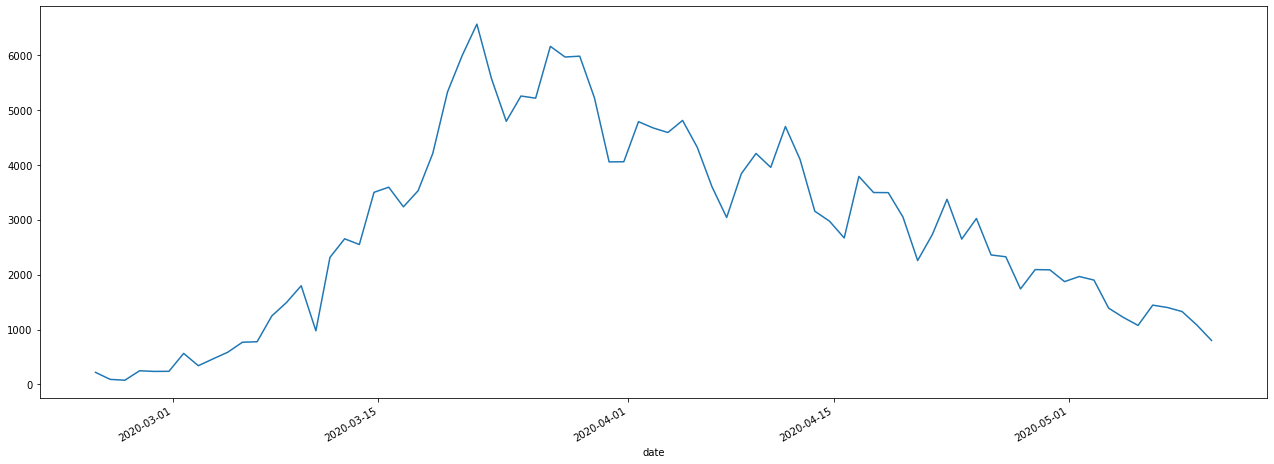

In [6]:
# plotto il grafico, uguale a quello che c'e' qui: 
# https://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1
df.nuovi_positivi.plot();

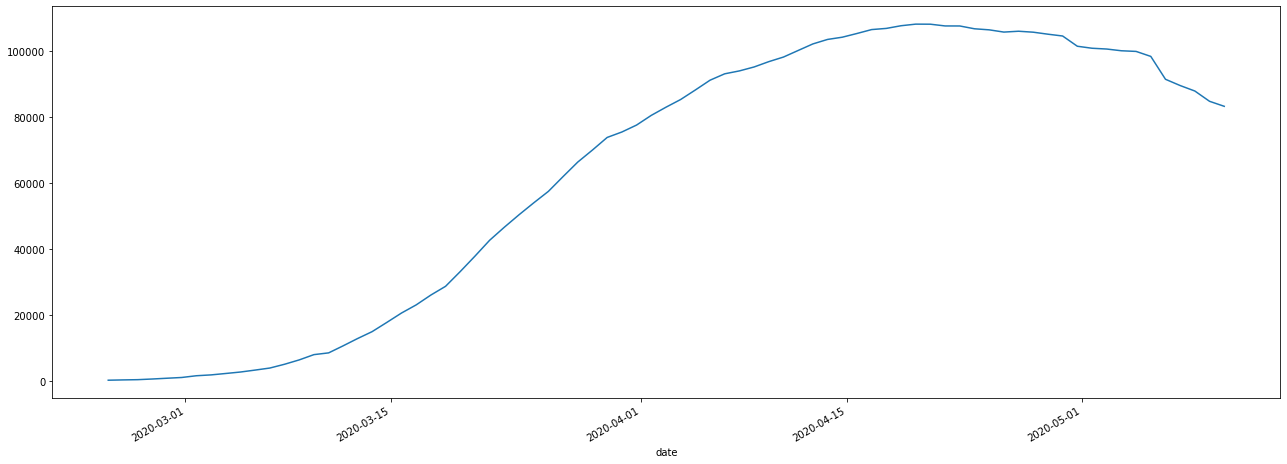

In [7]:
# plotto il grafico, uguale a quello che c'e' qui: 
# https://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1
df.totale_positivi.plot();

In [8]:
# model
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [9]:
series = df.nuovi_positivi

In [10]:
mean = series.mean()
std = series.std()
print("Mean: ", mean, " std: ", std)

Mean:  2844.961038961039  std:  1749.8082559733768


In [11]:
popt, pcov = curve_fit(gauss_function, range(0, len(series.index)), series, p0=[1,mean,std], maxfev=10000)
print(popt)
print(pcov)

[5075.01916769   37.05037319   17.77594556]
[[ 3.06492476e+04  6.26207587e-01 -7.71652317e+01]
 [ 6.26207587e-01  4.99356569e-01 -5.72115027e-03]
 [-7.71652317e+01 -5.72115027e-03  5.53195261e-01]]


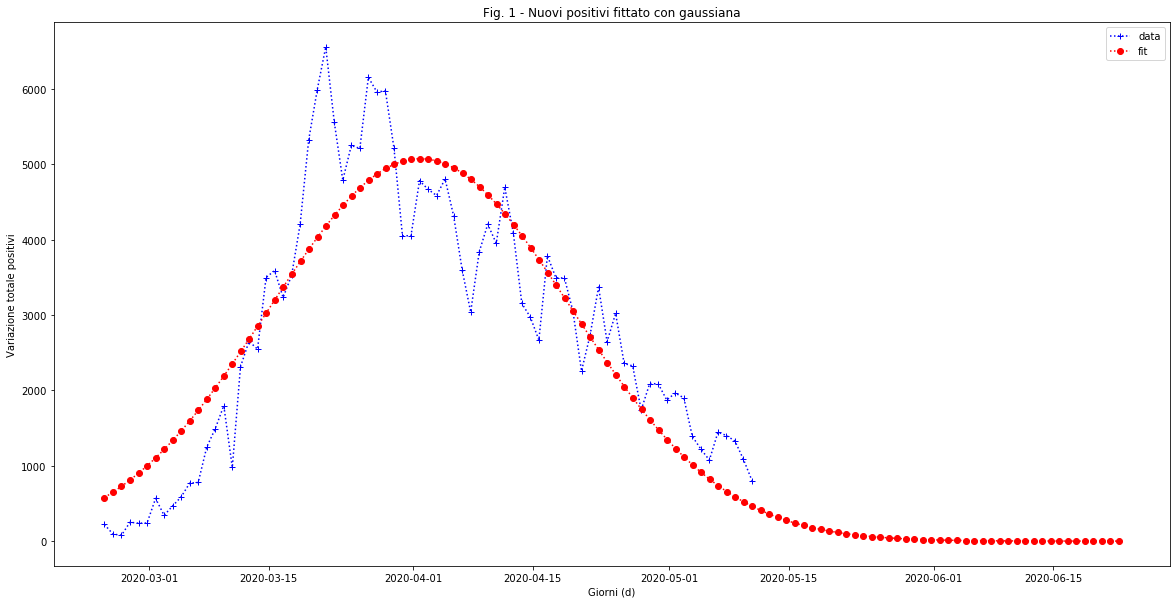

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(series.index, series,'b+:',label='data')
index = range(0, len(series))
periods = 120 # days
index = pd.date_range(series.index[0], periods=periods, freq='1D')
plt.plot(index, gauss_function(range(0, periods), *popt) ,'ro:',label='fit')
plt.legend()
plt.title('Fig. 1 - Nuovi positivi fittato con gaussiana')
plt.xlabel('Giorni (d)')
plt.ylabel('Variazione totale positivi');

In [13]:
when = pd.Series(gauss_function(range(0, periods), *popt), index=index)

In [14]:
when

2020-02-24 18:00:00    578.209275
2020-02-25 18:00:00    649.113365
2020-02-26 18:00:00    726.409692
2020-02-27 18:00:00    810.341891
2020-02-28 18:00:00    901.115652
                          ...    
2020-06-18 18:00:00      0.338732
2020-06-19 18:00:00      0.264261
2020-06-20 18:00:00      0.205512
2020-06-21 18:00:00      0.159318
2020-06-22 18:00:00      0.123117
Freq: D, Length: 120, dtype: float64

In [15]:
fine = when[when < 1]

In [16]:
fine.index[0] # averemo zero nuovi positivi

Timestamp('2020-06-14 18:00:00', freq='D')

In [17]:
series0 = df.totale_positivi

In [18]:
mean = series0.mean()
std = series0.std()
print("Mean: ", mean, " std: ", std)

Mean:  63698.142857142855  std:  41453.925930424404


In [19]:
popt0, pcov0 = curve_fit(gauss_function, range(0, len(series0.index)), series0, p0=[1,mean,std], maxfev=10000)
print(popt0)
print(pcov0)

[ 1.13077715e+05  5.69849835e+01 -2.16419525e+01]
[[ 1.25686120e+06 -6.87034039e+01  2.36166717e+02]
 [-6.87034039e+01  1.35164358e-01 -8.54145463e-02]
 [ 2.36166717e+02 -8.54145463e-02  1.52681511e-01]]


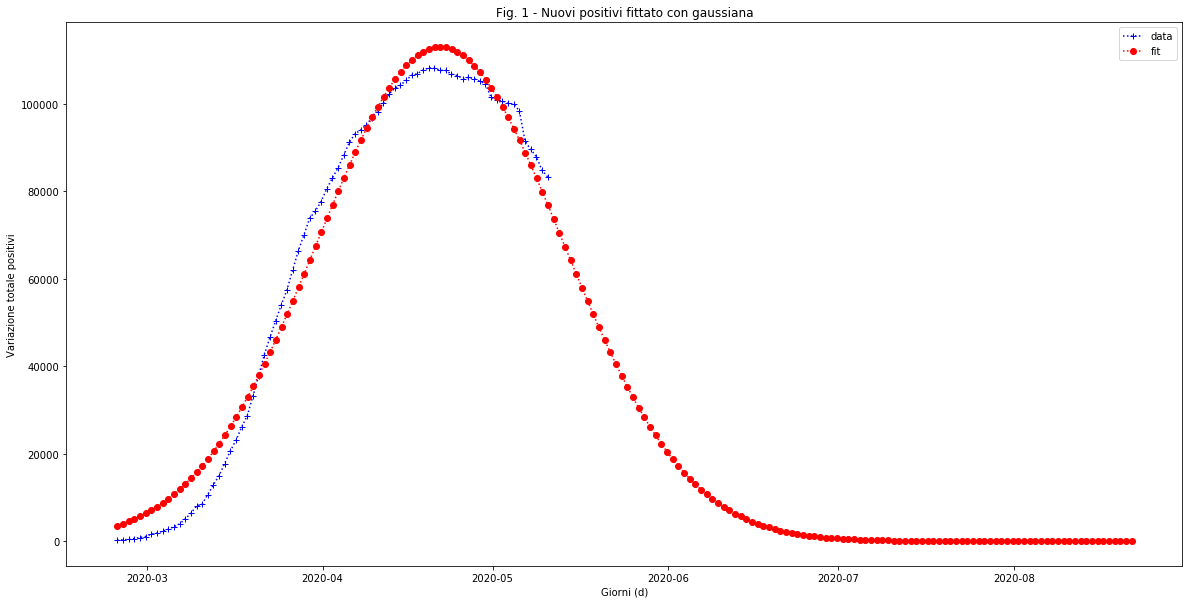

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(series0.index, series0,'b+:',label='data')
index = range(0, len(series0))
periods = 180 # days
index = pd.date_range(series0.index[0], periods=periods, freq='1D')
plt.plot(index, gauss_function(range(0, periods), *popt0) ,'ro:',label='fit')
plt.legend()
plt.title('Fig. 1 - Nuovi positivi fittato con gaussiana')
plt.xlabel('Giorni (d)')
plt.ylabel('Variazione totale positivi');

In [21]:
when0 = pd.Series(gauss_function(range(0, periods), *popt0), index=index)

In [22]:
when0

2020-02-24 18:00:00    3530.788652
2020-02-25 18:00:00    3983.334433
2020-02-26 18:00:00    4484.299186
2020-02-27 18:00:00    5037.501076
2020-02-28 18:00:00    5646.879040
                          ...     
2020-08-17 18:00:00       0.039473
2020-08-18 18:00:00       0.030648
2020-08-19 18:00:00       0.023746
2020-08-20 18:00:00       0.018359
2020-08-21 18:00:00       0.014163
Freq: D, Length: 180, dtype: float64

In [23]:
fine0 = when0[when0 < 1]

In [24]:
fine0.index[0] # quando questa rottura termina

Timestamp('2020-08-04 18:00:00', freq='D')